<a href="https://colab.research.google.com/github/harimancodes/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mini Project
# Airplane vs Motorocycle Image Classificatiion using ML

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


target=[]
images=[]
flatten_data=[]

DATADIR ='/content/drive/MyDrive/Smartknower/dataset'
CATEGORIES=['airplane','motorcycle']

for cat in CATEGORIES:
  class_num = CATEGORIES.index(cat) # Labell encoding
  path=os.path.join(DATADIR,cat) # Create path to use images
  for img in os.listdir(path):
    img_arr=imread(os.path.join(path,img))
    img_resized=resize(img_arr,(150,150,3)) #Normalizes the value to [0,1]
    flatten_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flatten_data)
target=np.array(target)
images=np.array(images)


In [ ]:
flat_data.shape

(142, 67500)

<BarContainer object of 2 artists>

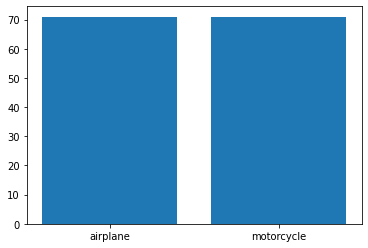

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=84)
print(x_train.shape)
print(x_test.shape)

(99, 67500)
(43, 67500)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=300)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)


array([[20,  1],
       [ 1, 21]])

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9534883720930233

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      0.95      0.95        22

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43



In [ ]:
import pickle
pickle.dump(model,open('airplane_vs_bike_model.p','wb'))

In [ ]:
model=pickle.load(open('airplane_vs_bike_model.p','rb'))

Enter your URL :https://stat.overdrive.in/wp-content/odgallery/2021/04/59231_2021_Jawa_forty_two_1_468x263.jpg
(263, 468, 3)
Predicted output : motorcycle


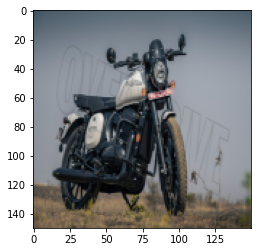

In [ ]:
#Testing a brand new image
flat_data=[]
url=input('Enter your URL :')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f"Predicted output : {y_out}")